In [1]:
import rasterio
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('../')

In [3]:
from huhuha.settings import DATA_DIR
tiles_datadir = DATA_DIR / 'opentopomap_tiles'

In [4]:
!pwd

/home/jslowik/projects/pwr/geo/huhuha/notebooks


In [5]:
file = rasterio.open(f'{tiles_datadir}/zoom_14/esri_map_z_ArcGIS_x_rest_y_services')
dataset = file.read()
print(dataset.shape)

(3, 256, 256)


NameError: name 'ital' is not defined

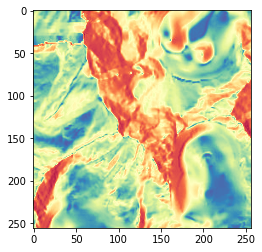

In [6]:
plt.imshow(dataset[0], cmap='Spectral')

# import numpy as np

ital

value_range = np.amax(dataset[0]) + abs(np.amin(dataset[0]))
plt.show()

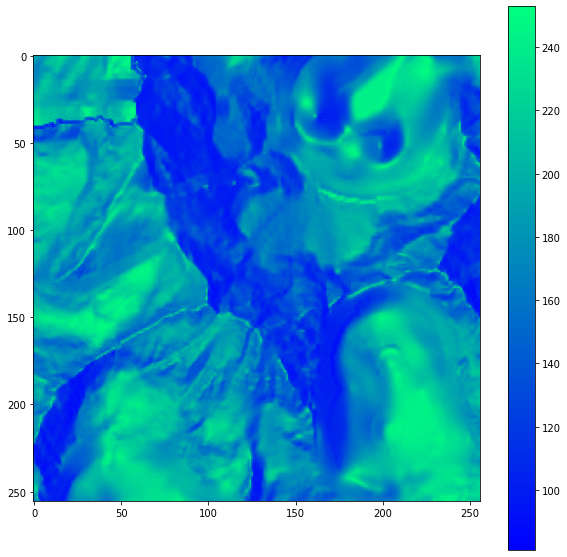

In [9]:
plt.figure(figsize=(10,10))
c = plt.imshow(dataset[2], cmap='winter')
#c = plt.imshow(dataset[2], cmap='Spectral')
plt.colorbar(c)
plt.show()

ValueError: 'spectral' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

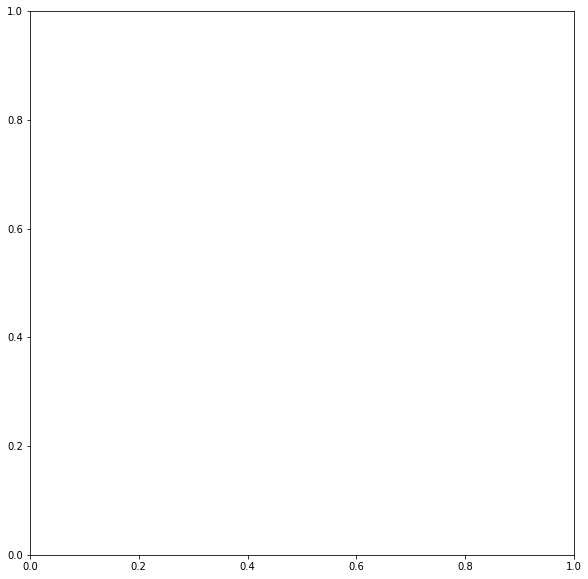

In [37]:
plt.figure(figsize=(10,10))
c = plt.imshow(dataset[0], cmap='spectral')
plt.colorbar(c)
plt.show()

In [24]:
from matplotlib.colors import LinearSegmentedColormap
italy_colormap = LinearSegmentedColormap.from_list('italy', ['#008C45', '#0b914c', '#F4F5F0', '#cf2a32', '#CD212A'], N=value_range)

In [25]:
from matplotlib.colors import ListedColormap

background_color = np.array([0.9882352941176471, 0.9647058823529412, 0.9607843137254902, 1.0])
newcolors = italy_colormap(np.linspace(0, 1, value_range))
newcolors = np.vstack((newcolors, background_color))
italy_colormap = ListedColormap(newcolors)

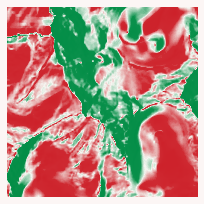

In [26]:
from matplotlib import colors

fig = plt.figure(facecolor='#FCF6F5FF')
fig.set_size_inches(7, 3.5)
ax = plt.axes()
plt.imshow(dataset[0], cmap=italy_colormap)
ax.axis('off')
plt.show()

In [27]:
import earthpy.spatial as es

italy_topography = dataset

hillshade = es.hillshade(italy_topography[0], azimuth=240, altitude=1)

findfont: Font family ['fantasy'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'fantasy' not found because none of the following families were found: Chicago, Charcoal, Impact, Western, Humor Sans, xkcd, fantasy


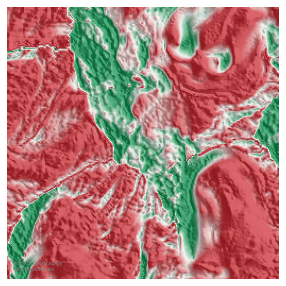

In [29]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
i = plt.imshow(italy_topography[0], cmap=italy_colormap, norm=colors.LogNorm())
ax.imshow(hillshade, cmap="Greys", alpha=0.3)
ax.axis('off')

# logo = plt.imread('../../globe.png')
newax = fig.add_axes([0.79, 0.78, 0.08, 0.08], anchor='NE')
#newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.02, 0.03, "Italy Topography \n@PythonMaps",
              size=6,
              color='grey',
              transform = ax.transAxes,
              fontfamily='fantasy')
plt.show()